# Demo for gabor filterbank functions

Tom Wallis, August 2015

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from psyutils.image import show_im
import psyutils as pu

%load_ext autoreload
%autoreload 2

%matplotlib inline

## Demos with an artificial edge image

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.0 to max 1.0
the mean of the image is 0.502
the SD of the image is 0.225
the rms contrast (SD / mean) is 0.449


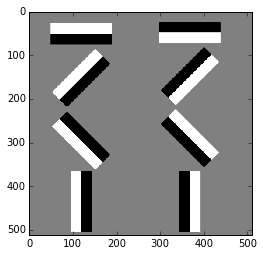

In [2]:
# load a test image:
img = pu.im_data.orientation_test()
show_im(img)

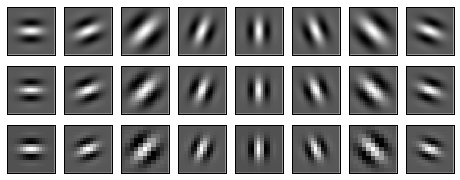

In [3]:
# make a filterbank and visualise:
ppd = 43  # set the pixels per degree of visual angle
frequencies = [1, 4, 8]   # in cycles per deg
n_orientations = 8   # will run from 0 to pi. 0 is a "horizontal" gabor (vertical carrier).
pu.image.gaborbank_vis(frequencies=frequencies, n_orientations=n_orientations, ppd=ppd)

In [4]:
# convolve this filterbank with our demo image:
out = pu.image.gaborbank_convolve(img, frequencies=frequencies,
                                  n_orientations=n_orientations,
                                  ppd=ppd)

# out is a dict with a couple of entries:
print(out.keys())
print(out['f'])
print(out['theta'])

dict_keys(['theta', 'f', 'res'])
[1 4 8]
[ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357]


In [5]:
# res is a 4D numpy array containing the filter responses for each 
# pixel, scale and orientation:
res = out['res']  # pull it out of the dict for easier reading.
res.shape

(512, 512, 3, 8)

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from -0.201 to max 0.234
the mean of the image is 0.017
the SD of the image is 0.038
the rms contrast (SD / mean) is 2.241


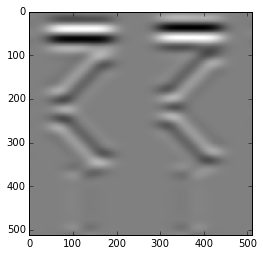

In [6]:
# it contains the complex-valued Gabor responses.
# lowest SF scale, vertical orientation, sin component:
show_im(res[:, :, 0, 0].real)  

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from -0.243 to max 0.243
the mean of the image is 0.0
the SD of the image is 0.038
the rms contrast (SD / mean) is 994.049


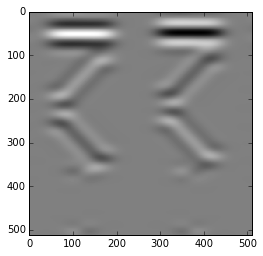

In [7]:
# lowest SF scale, vertical orientation, cos component:
show_im(res[:, :, 0, 0].imag)  

### Energy (phase invariant response)

The energy is the sum of squared odd and even filter responses.

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.002 to max 0.129
the mean of the image is 0.024
the SD of the image is 0.035
the rms contrast (SD / mean) is 1.455


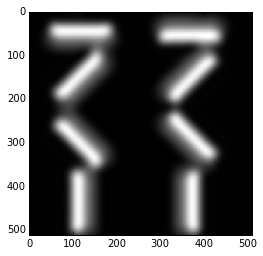

In [8]:
# compute the energy (phase invariant response) over all orientations.
# this is approximately the contrast at a given scale.
e = res.real**2 + res.imag**2
show_im(e.sum(axis=3)[:, :, 0])  # energy at lowest scale, over all orientations

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.0 to max 0.078
the mean of the image is 0.004
the SD of the image is 0.008
the rms contrast (SD / mean) is 1.917


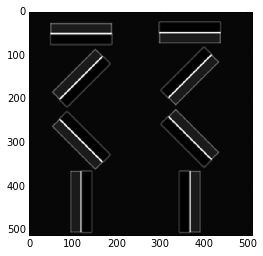

In [9]:
show_im(e.sum(axis=3)[:, :, 2])  # energy at highest scale, over all orientations

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.006 to max 0.272
the mean of the image is 0.035
the SD of the image is 0.049
the rms contrast (SD / mean) is 1.422


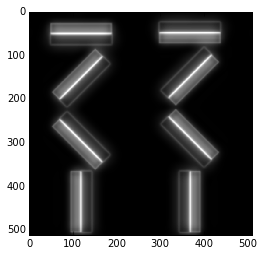

In [10]:
# energy over all scales and orientations:
show_im(e.sum(axis=3).sum(axis=2))

### Visualise orientations

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512, 3)
image has range from 0.0 to max 1.0
the mean of the image is 0.056
the SD of the image is 0.139
the rms contrast (SD / mean) is 2.505


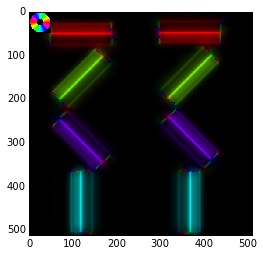

In [11]:
# orientations, energy averaged over scales
show_im(pu.image.gaborbank_orientation_vis(out))

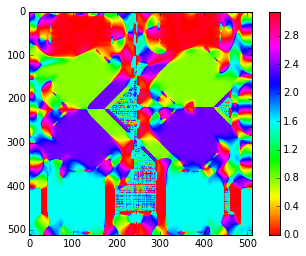

In [12]:
# show orientation estimates unweighted by filter energy:
oris = pu.image.gaborbank_mean_orientation(out)
plt.imshow(oris, cmap='hsv')
plt.colorbar();

### Phase angle

The phase at each point in the image.

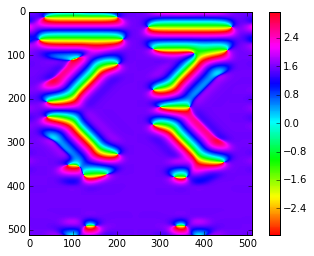

In [13]:
phase = pu.image.gaborbank_phase_angle(out)
plt.imshow(phase[:, :, 0, 0], cmap='hsv')
plt.colorbar();

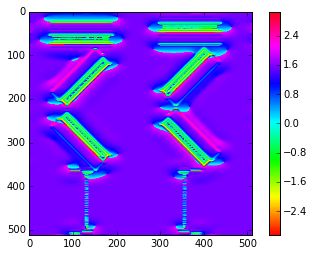

In [14]:
# check summing over scales:
summed_phase = phase.mean(axis=2)
plt.imshow(summed_phase[:, :, 0], cmap='hsv')
plt.colorbar();

### Orientation variance

Orientation variance can run from 0--1, where 0 means that all filter responses point in one direction (indicating a strong edge) whereas 1 shows all filter responses are equally strong (i.e. no dominant direction).

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.149 to max 1.0
the mean of the image is 0.746
the SD of the image is 0.295
the rms contrast (SD / mean) is 0.395


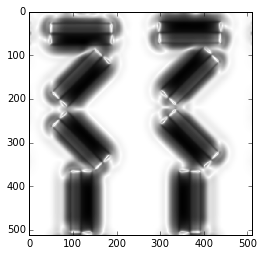

In [15]:
show_im(pu.image.gaborbank_orientation_variance(out))

## Demo with a different synthetic image

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512, 3)
image has range from 0.0 to max 1.0
the mean of the image is 0.094
the SD of the image is 0.169
the rms contrast (SD / mean) is 1.811


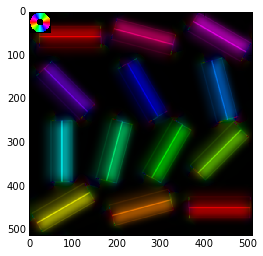

In [16]:
img = pu.im_data.orientation_test_2()
out = pu.image.gaborbank_convolve(img, frequencies=[1, 10],
                                  n_orientations=12,
                                  ppd=ppd)
ori_im = pu.image.gaborbank_orientation_vis(out) 
show_im(ori_im)

## Demo with a natural image

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (256, 256)
image has range from 0.012 to max 1.0
the mean of the image is 0.515
the SD of the image is 0.194
the rms contrast (SD / mean) is 0.376


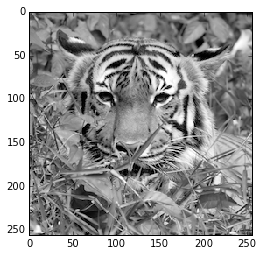

In [17]:
# load a test image
img = pu.im_data.tiger_grey()
show_im(img)

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (256, 256)
image has range from 0.004 to max 0.225
the mean of the image is 0.047
the SD of the image is 0.029
the rms contrast (SD / mean) is 0.623


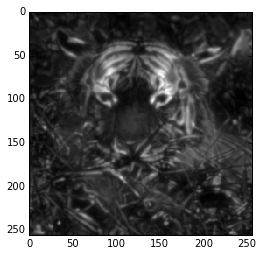

In [18]:
out = pu.image.gaborbank_convolve(img, frequencies=[0.5, 1, 5, 10],
                                  n_orientations=12,
                                  ppd=ppd)
e = out['res'].real**2 + out['res'].imag**2
e = e.sum(axis=3).sum(axis=2)
show_im(e)

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (256, 256, 3)
image has range from 0.0 to max 1.0
the mean of the image is 0.097
the SD of the image is 0.128
the rms contrast (SD / mean) is 1.318


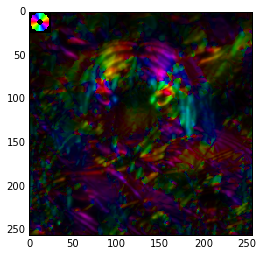

In [19]:
ori_im = pu.image.gaborbank_orientation_vis(out) 
show_im(ori_im)

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (256, 256)
image has range from 0.214 to max 0.998
the mean of the image is 0.702
the SD of the image is 0.151
the rms contrast (SD / mean) is 0.215


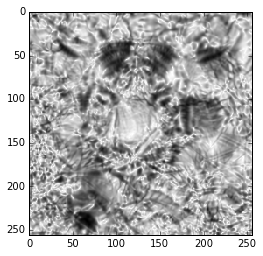

In [20]:
show_im(pu.image.gaborbank_orientation_variance(out))

## Circular mean versus max filter

By default the `gaborbank_orientation_vis` function returns orientations estimated by the circular mean (average between filter responses). That is, it interpolates orientations between the filters. An alternative is to just take the orientation of the filter with maximum response to be the orientation at a given pixel. This is simpler but also means your answer depends strongly on how many orientation filters you use.

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512)
image has range from 0.0 to max 1.0
the mean of the image is 0.502
the SD of the image is 0.287
the rms contrast (SD / mean) is 0.573


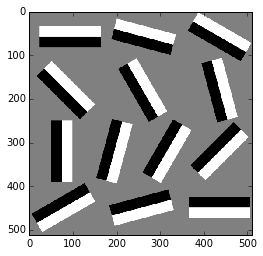

In [21]:
img = pu.im_data.orientation_test_2()
show_im(img)

In [22]:
out = pu.image.gaborbank_convolve(img, frequencies=[1, 10],
                                  n_orientations=4,
                                  ppd=ppd)
mean_ori = pu.image.gaborbank_mean_orientation(out)  # mean resultant vector
max_ori = pu.image.gaborbank_max_orientation(out)  # max filter

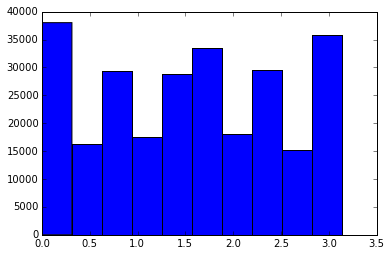

In [23]:
# lots of unique orientation values in the mean ori:
plt.hist(mean_ori.flatten());

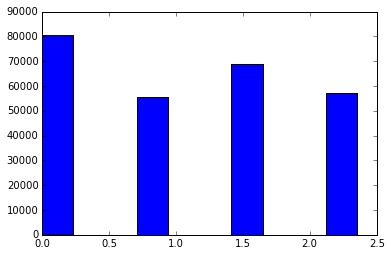

In [24]:
# using the max response:
plt.hist(max_ori.flatten());

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512, 3)
image has range from 0.0 to max 1.0
the mean of the image is 0.085
the SD of the image is 0.154
the rms contrast (SD / mean) is 1.805


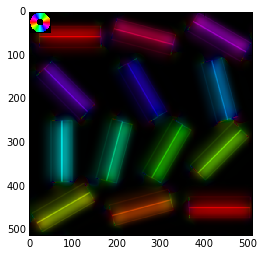

In [25]:
show_im(pu.image.gaborbank_orientation_vis(out, method='mean'))

image is of type <class 'numpy.ndarray'>
image has data type float64
image has dimensions (512, 512, 3)
image has range from 0.0 to max 1.0
the mean of the image is 0.085
the SD of the image is 0.156
the rms contrast (SD / mean) is 1.833


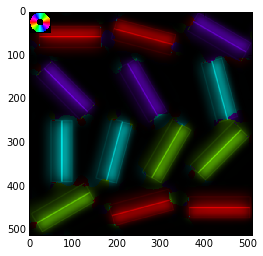

In [26]:
show_im(pu.image.gaborbank_orientation_vis(out, method='max'))

Using the max response creates orientation bins rather than continuous interpolation.